In [6]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from nist_ms.small_molecule.plotting import *
from nist_ms.small_molecule.utils import *
from nist_ms.spectrum.plotting import *

# Read in pandas dataframe containing library info and show columns

In [7]:
df = pd.read_pickle("\\Users\\lyg\\data\\deep\\spectra\\ei\\newlib_2.pkl")
print(df.dtypes)

aromatic_rings             int64
column                    object
cross_set                  int64
ecfp4                     object
estimated_ri              object
estimated_ri_error        object
exact_mw                 float64
experimental_ri          float64
experimental_ri_data     float64
experimental_ri_error    float64
fingerprint               object
formula                   object
has_2d                      bool
has_conformer               bool
hba                        int64
hbd                        int64
inchi_key                 object
isomeric_smiles           object
max_bound                float64
max_x                    float64
max_y                    float64
max_z                    float64
min_x                    float64
min_y                    float64
min_z                    float64
mol                       object
name                      object
num_atoms                  int64
num_conformers             int64
num_stereoisomers          int64
num_undef_

# Subset the dataframe with a query and print the names of matching compounds

In [8]:
df_subset = df.query("100 < tpsa < 120 and rotatable_bonds==4")
df_subset["name"]

id
468167    1-(5-Deoxypentofuranosyl)-5-fluoropyrimidine-2...
471036    Benzoic acid, 2-chloro-3,5-dinitro-, methyl ester
472554                            3',5'-Dinitroacetophenone
474645    5'-Amino-4-nitro-[1,1':3',1''-terphenyl]-4',6'...
475231              2-Chloro-N-(2,4-dinitrophenyl)acetamide
476248      4-(2-Isonicotinoylhydrazino)-4-oxobutanoic acid
477288     Pyrimidine, 4-amino-2-(cyclohexylamino)-5-nitro-
477356    2-(2-Hydroxyethyl)-5-nitro-1H-benzo[de]isoquin...
477648    2-Hydrazinyl-4,6-di(morpholin-4-yl)-1,3,5-tria...
482534                      3,5-Bis(2-nitrophenyl)isoxazole
482548                          (2,4-Dinitrophenyl)methanol
483037    2-(((4-Nitrophenyl)sulfonyl)prolyl)-1,2,3,4-te...
483041    2-(((2-Nitrophenyl)sulfonyl)prolyl)-1,2,3,4-te...
484150                                           Cyromazine
484661                                           Dicyclanil
485468                                 4,6-Dinitro-o-cresol
485755                               

# Do a scatter plot of the relation between RI and rotatable bonds

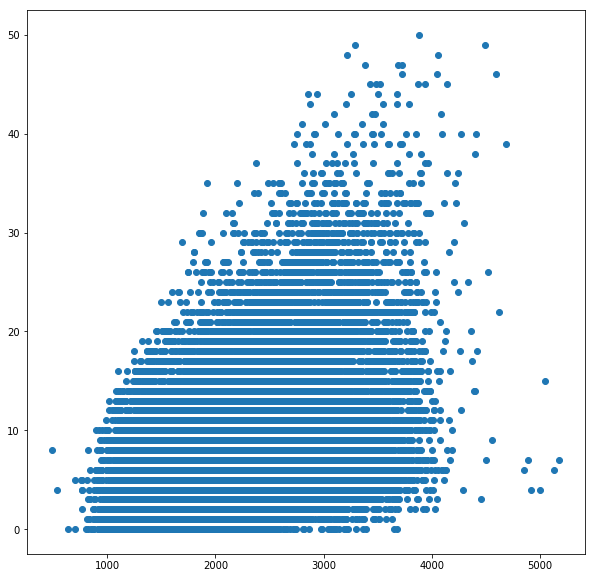

In [9]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
plt.scatter(df["experimental_ri"], df["rotatable_bonds"])

# Retrieve a compound from the dataframe and display the last conformer in 3D

In [10]:
fluazinam = df.query("name == 'Fluazinam'").iloc[0]
draw_3d(fluazinam.mol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Plot the spectrum of fluazinam

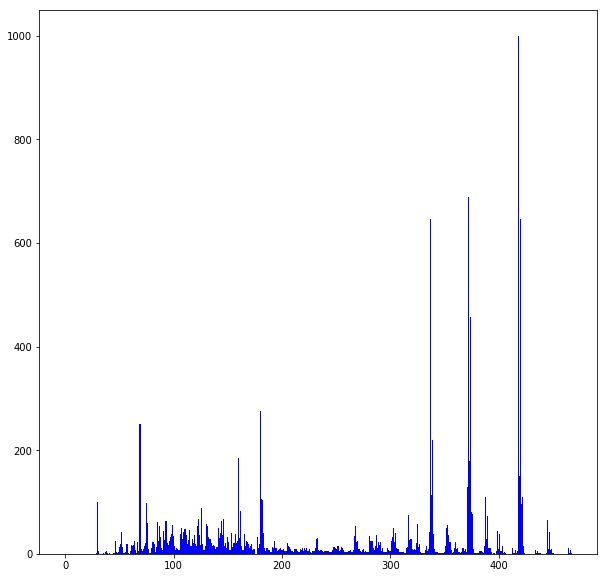

In [11]:
mirror_plot(fluazinam.spectrum)

# Read in dataframes that contain the elemental composition of the dataframe records and the spectral peaks

In [12]:
mzs = pd.read_pickle("nist_utils2/newlib_2.mzs.pkl")
elements = pd.read_pickle("nist_utils2/newlib_2.elements.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'nist_utils2/newlib_2.mzs.pkl'

# Use the element dataframe to retrieve compounds with selenium in them

In [ ]:
df.join(elements.query("atomic_num == 34"), how='inner').name


# Use the mz dataframe to pick all compounds that have particular peaks

In [ ]:
df.join(mzs.query("mz == 563").join(mzs.query("mz == 741"), how='inner', lsuffix="_left2", rsuffix="_right2"), how='inner', lsuffix="_left", rsuffix="_right").name

# Explore the spectrum object

In [14]:
print(fluazinam.spectrum.name)
print(fluazinam.spectrum.properties)

Fluazinam
{'RETENTION INDEX': 's=2049.1', 'STATUS': 'Accept | 2018-03-19-21:28:56 | James Little | ok', 'COMPOUND_HASH': 'XVQMHBZWTBDHMT-UHFFFAOYNA-N-0-C0079622596', 'EXACT MASS': '463.95138', 'CASNO': '79622596', 'ID': '17756', 'COMMENT': 'AMDIS_Name="Component at scan 1096 [Model = +418u]" EvalLib=yf-2018-02-01.eval EvalLibID=125 CONTRIBUTOR="NIST Mass Spectrometry Data Center, 2018"', 'RIDATA_00': '3459', 'RIDATA_01': '2049.1', 'RIDATA_02': '11.778', 'RIDATA_03': '2018-02-23 (19h 11m 18s)', 'RIDATA_04': 'GC', 'RIDATA_05': 'Front SS Inlet He', 'RIDATA_06': '20 :1', 'RIDATA_07': '270C', 'RIDATA_08': 'Ramp', 'RIDATA_09': '50C', 'RIDATA_10': '1 min', 'RIDATA_11': '15C/min', 'RIDATA_12': '300C', 'RIDATA_13': '7.333 min', 'RIDATA_15': 'Agilent CP8939', 'RIDATA_16': 'VF-5ms', 'RIDATA_17': 'SSNP', 'RIDATA_18': '15 m', 'RIDATA_19': '250 um', 'RIDATA_20': '0.25 um', 'RIDATA_21': 'He', 'RIDATA_22': '1.2 mL/min', 'RIDATA_23': '270C', 'RIDATA_24': '230 C   maximum 250 C', 'RIDATA_25': '5977B_MR'

In [ ]:
print(fluazinam.spectrum.products.intensity)

In [ ]:
print(fluazinam.spectrum.products.mz)

# Do a spectral search

In [ ]:
results = {}
fluazinam.spectrum.search_spectra(df, None, results, cosine_threshold=600)
results

# Select one hit and do a mirror plot of the match

In [ ]:
hit = next(iter(results))
mirror_plot(df.loc[hit[0]].spectrum, df.loc[hit[1]].spectrum)

# Do a structural similarity search and print the hits

In [19]:
hits = similarity_search(df["fingerprint"], fluazinam.fingerprint, 0.81)
df[hits]

,aromatic_rings,column,cross_set,ecfp4,estimated_ri,estimated_ri_error,exact_mw,experimental_ri,experimental_ri_data,experimental_ri_error,...,num_undef_double,num_undef_stereo,partial_charges,precursor_mz,rotatable_bonds,set,smiles,spectrum,tpsa,has_tms
id,,,,,,,,,,,,,,,,,,,,,
485069,2,Agilent CP8939,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None,293.020333,2600.7,1.0,0.0,...,0,0,"[0.133, 0.907, 0.907, -0.15, 0.1, 0.133, -0.60...",293,4,test,[H]c1c([H])c([H])c(N([H])c2c([H])c([H])c([N+](...,<nist_ms.spectrum.small_molecule.NISTSpectrum ...,98.31,False
485755,2,Agilent CP8939,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None,463.951379,2049.1,1.0,0.0,...,0,0,"[0.41000000000000003, 0.177, -0.15, -0.1435, 0...",464,4,train,[H]c1nc(N([H])c2c([N+](=O)[O-])c([H])c(C(F)(F)...,<nist_ms.spectrum.small_molecule.NISTSpectrum ...,111.20,False
493796,1,RESTEK 13623_20m,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None,225.975690,1159.5,1.0,0.0,...,0,0,"[-0.34, 1.1635, -0.34, -0.34, -0.1435, 0.487, ...",226,1,train,[H]c1nc(Cl)c(C(F)(F)F)c([H])c1[N+](=O)[O-],<nist_ms.spectrum.small_molecule.NISTSpectrum ...,56.03,False
503134,1,RESTEK 13620,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None,207.025561,1298.5,1.0,0.0,...,0,0,"[-0.34, 1.1635, -0.34, -0.34, 0.1665, -0.62, 0...",207,2,train,[H]c1c(C(F)(F)F)nc(N([H])[H])c([N+](=O)[O-])c1[H],<nist_ms.spectrum.small_molecule.NISTSpectrum ...,82.05,False


In [15]:
print(fluazinam)

aromatic_rings                                                           2
column                                                      Agilent CP8939
cross_set                                                                1
ecfp4                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
estimated_ri                                                          None
estimated_ri_error                                                    None
exact_mw                                                           463.951
experimental_ri                                                     2049.1
experimental_ri_data                                                     1
experimental_ri_error                                                    0
fingerprint              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
formula                                                     C13H4Cl2F6N4O4
has_2d                                                                True
has_conformer            

In [21]:

draw_3d(df.loc["485069"].mol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol